# Classical prediction applied to suvival analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
%matplotlib inline
import warnings
from functions import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set()

from imblearn.over_sampling import SMOTE

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be importe

### Models without nutritional data

In [9]:
df = pd.read_csv("../data/preprocess2/data_No_nutrition.csv")
rand_state = 42

In [10]:
df.head(2)

,release_year,gender,age_year,age_month,race_ethnicity,military,citizenship,education,maried,num_poeple_houshold,family_income_to_poverty_ratio,2yr_weight,2yr_weight_mec,smoke,LBXTC,LBDTCSI,LBDHDL,LBDHDLSI,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,sytolic_blood_presure_x,diatolic_blood_presure_x,pulse regularity_x,have asthma,overweight,heart failure background,coronary heart disease background,angina/angina pectoris background,heart attack background,stroke background,thyroid problem background,chronic bronchitis background,liver condition background,heart attack family background,asthma family background,diabetes family background,diagnosed_diabetes,take_insulin,prediabetic,diabetes risk,mortstat,ucod_leading,diabetes,hyperten,permth_int,permth_exm,age_follow_up_end,month_to_release,income_low,income_up,income_less,income_more
0,2000,Male,77,926.0,Non-Hispanic White,Yes,Citizen by birth or naturalization,more_highschool,NaN,1,5.0,26678.636376,28325.384898,no,215.0,5.56,54.0,1.39,128.0,1.45,136.0,3.52,100.666667,56.666667,Regular,NaN,NaN,No,No,No,No,No,NaN,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN,Assumed Dead,Alzheimer's disease,No,No,177.0,176.0,92,5.0,45000.0,54999.0,0,0
1,2000,Male,49,597.0,Non-Hispanic White,Yes,Citizen by birth or naturalization,more_highschool,Married,3,5.0,91050.846620,99445.065735,no,279.0,7.21,42.0,1.08,347.0,3.92,168.0,4.34,122.000000,82.666667,Regular,NaN,NaN,No,No,No,No,No,NaN,No,No,NaN,NaN,NaN,No,No,NaN,NaN,Assumed Alive,NaN,NaN,NaN,191.0,190.0,65,5.0,75000.0,NaN,0,1


In [11]:
df.shape

(43720, 54)

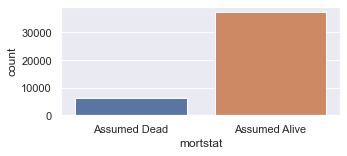

In [12]:
ax  = plt.figure(figsize=(5,2))
g = sns.countplot(data=df, x='mortstat')

In [13]:
# this the data set we delete all the observations with heart desease background

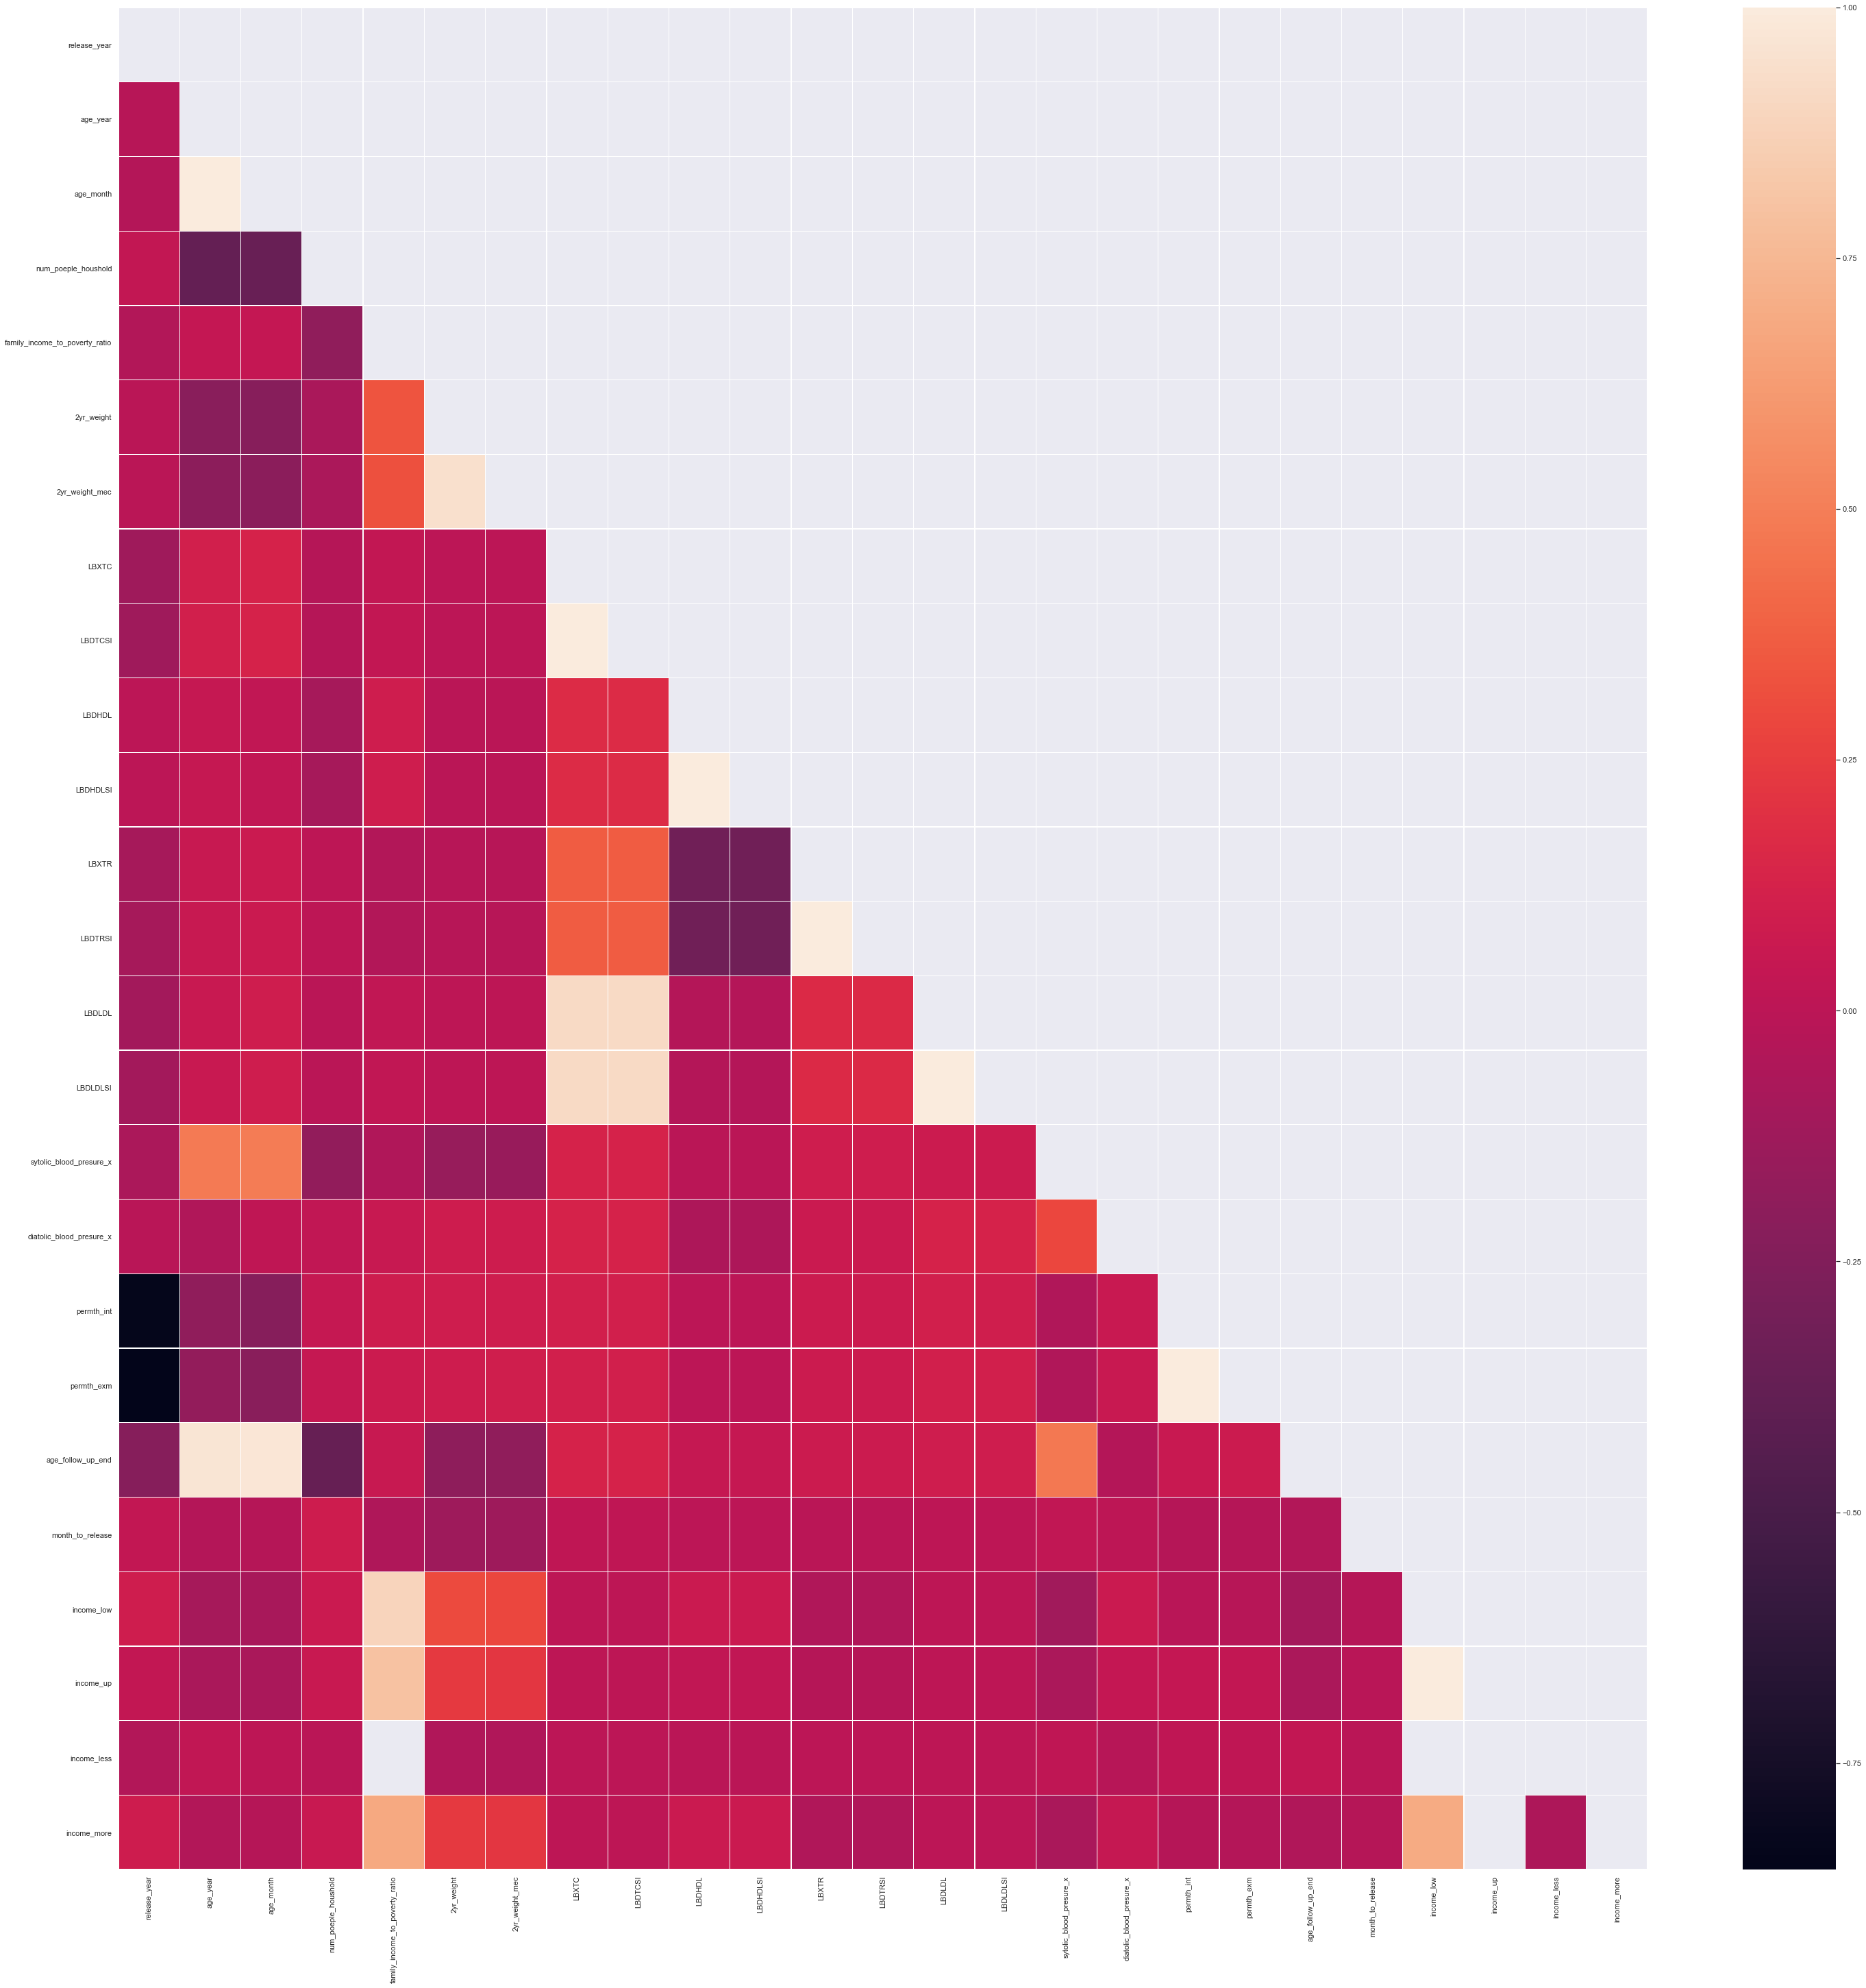

In [14]:
fig = plt.figure(figsize=(50,50))
corrmat = df.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, vmax=1, linewidths=.3, mask = mask );

* we will delete some of the highly corelated fetures:  
age_year, age_month
LBXTC, LBDTCSI
LBXTR, LBDTRSI
income_low income_up

* we alse delete nutritional features:  
Total fat (gm), Total saturated fatty acids (gm), Total monounsaturated fatty acids (gm),
Total polyunsaturated fatty acids (gm), SFA 16:0 (Hexadecanoic) (gm), SFA 18:0 (Octadecanoic) (gm), 
MFA 16:1 (Hexadecenoic) (gm), PFA 18:2 (Octadecadienoic) (gm), PFA 18:3 (Octadecatrienoic) (gm), 
SFA 4:0 (Butanoic) (gm), SFA 6:0 (Hexanoic) (gm) , SFA 8:0 (Octanoic) (gm), SFA 10:0 (Decanoic) (gm)

In [6]:
del_cols = ["ucod_leading","diabetes","hyperten","permth_int","permth_exm","age_follow_up_end"]
data = df.copy()
train_, test_ = preprocess(data, 'mortstat', 2000, rand_state, del_col= del_cols)

In [7]:
y_test_ = test_.mortstat.values
X_test_= test_.drop('mortstat', axis= 1).values
y_train_ = train_.mortstat.values
X_train_ = train_.drop('mortstat', axis=1).values

In [18]:
models = get_models()

In [19]:
for model in models.keys() :
    print(model+" : "+ cross_validation(models[model], X_train_, y_train_, 5))

logistic_regresseion : accuracy : 0.78 (+/- 0.02)
decision_tree : accuracy : 0.80 (+/- 0.02)
light_gradient_boosting : accuracy : 0.81 (+/- 0.01)
Gradient_boosting : accuracy : 0.83 (+/- 0.01)
random_forest : accuracy : 0.82 (+/- 0.02)


In [56]:
models_nutri, res_nutri = fit_test_models(models, X_train, y_train,  X_test, y_test)
res_nutri

,accuracy,precision,recall,f1,conf_mat
logistic_regresseion,0.74225,0.717557,0.7990,0.756092,"[[1371, 629], [402, 1598]]"
decision_tree,0.79925,0.803961,0.7915,0.797682,"[[1614, 386], [417, 1583]]"
light_gradient_boosting,0.81375,0.823620,0.7985,0.810866,"[[1658, 342], [403, 1597]]"
Gradient_boosting,0.83175,0.839386,0.8205,0.829836,"[[1686, 314], [359, 1641]]"
random_forest,0.81400,0.826403,0.7950,0.810398,"[[1666, 334], [410, 1590]]"


### Models with Nutritional data

In [15]:
df = pd.read_csv("../data/preprocess2/data_nutrition.csv")

In [51]:
del_cols = ["ucod_leading","diabetes","hyperten","permth_int","permth_exm","age_follow_up_end"]
rand_state = 42
train, test = preprocess(df, 'mortstat', 2000, rand_state, del_col= del_cols)

Text(0.5, 1.0, 'test set')

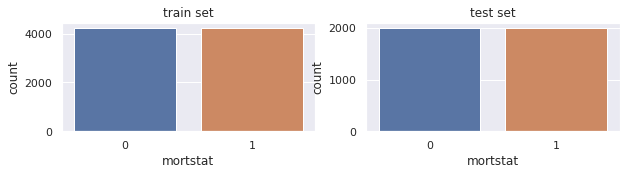

In [52]:
# label 1 : Assumed Dead
f, axes = plt.subplots(1, 2, figsize=(10, 2), sharex=True)
sns.countplot(data=train, x='mortstat', ax= axes[0]).set_title('train set')
sns.countplot(data=test, x='mortstat', ax= axes[1]).set_title('test set')

In [53]:
y_test = test.mortstat.values
X_test= test.drop('mortstat', axis= 1).values
y_train = train.mortstat.values
X_train = train.drop('mortstat', axis=1).values

In [54]:
models_nutri = get_models()

In [55]:
#cross validation
for model in models.keys() :
    print(model+" : "+ cross_validation(models[model], X_train, y_train, 5))

logistic_regresseion : accuracy : 0.74 (+/- 0.03)
decision_tree : accuracy : 0.81 (+/- 0.01)
light_gradient_boosting : accuracy : 0.81 (+/- 0.01)
Gradient_boosting : accuracy : 0.83 (+/- 0.01)
random_forest : accuracy : 0.82 (+/- 0.02)


In [20]:
models, res = fit_test_models(models, X_train_, y_train_,  X_test_, y_test_)
res

# when including nutrition data we get better results we grandient boosting

,accuracy,precision,recall,f1,conf_mat
logistic_regresseion,0.76550,0.745606,0.806,0.774628,"[[1450, 550], [388, 1612]]"
decision_tree,0.79975,0.806336,0.789,0.797574,"[[1621, 379], [422, 1578]]"
light_gradient_boosting,0.81625,0.826873,0.800,0.813215,"[[1665, 335], [400, 1600]]"
Gradient_boosting,0.82425,0.832394,0.812,0.822070,"[[1673, 327], [376, 1624]]"
random_forest,0.81375,0.831484,0.787,0.808631,"[[1681, 319], [426, 1574]]"
